In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [2]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv') 
df_test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
df_greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')

In [3]:
df_train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [4]:
df_greeks

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [5]:
df_train.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [6]:
df_train.shape

(617, 58)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


98.32873688509873
61.642115


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


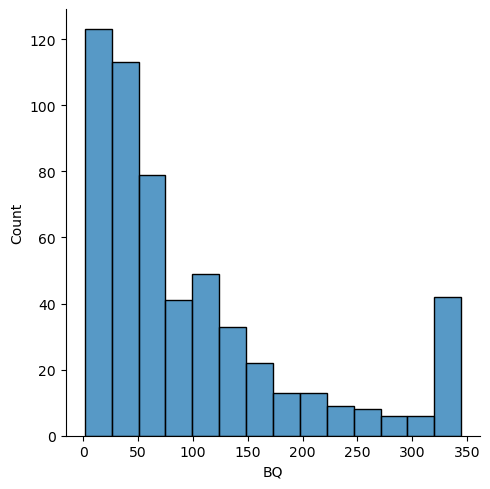

In [7]:
import seaborn as sns
not_null= df_train[df_train['BQ'].notnull()]['BQ']
sns.displot(not_null)
bq_median=np.median(not_null)
print(np.mean(not_null))
print(np.median(not_null))

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


69.58259579622981
71.949306


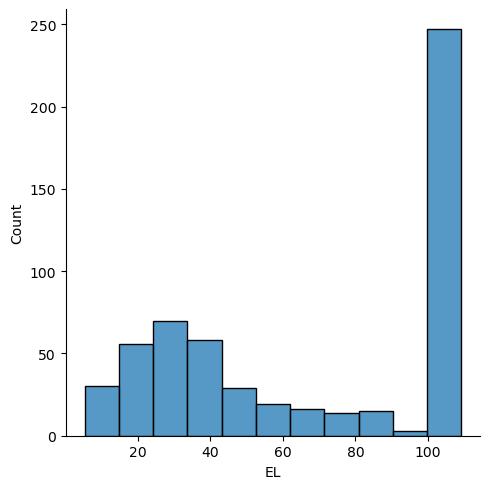

In [8]:
not_null= df_train[df_train['EL'].notnull()]['EL']

sns.displot(not_null)
cb_median=np.median(not_null)
print(np.mean(not_null))
print(np.median(not_null))

In [9]:
newcol=df_train.columns.tolist()
newcol.remove('BQ') 
newcol.remove('EL')

In [10]:
print(newcol)

['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG', 'EH', 'EJ', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class']


In [11]:
for i in newcol:
    df_train.dropna(subset=i, inplace=True)

In [12]:
df_train['BQ'].replace(np.nan,bq_median,inplace=True)
df_train['EL'].replace(np.nan,cb_median,inplace=True)

In [13]:
one_hot_encoded = pd.get_dummies(df_train['EJ'])
new_df=pd.concat([df_train,one_hot_encoded],axis=1)

In [14]:
X=new_df.drop(['Id','Class','EJ'],axis=1)
y=new_df['Class']

In [15]:
X=X.drop('B',axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler
X_columns=X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_columns)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import pandas as pd

# Assuming 'X' is your feature matrix and 'X_columns' contains the column names
# Create an initial DataFrame to store the VIF values
vif = pd.DataFrame()

# Initialize a flag to keep track of whether any VIF is greater than or equal to 10
vif_greater_than_10 = True

while vif_greater_than_10:
    # Calculate the VIF for each feature in 'X'
    vals = [VIF(X.values, i) for i in range(X.shape[1])]
    
    # Create a DataFrame with the VIF values and their corresponding column names
    vif = pd.DataFrame({'VIF': vals}, index=X_columns)
    
    # Check if any VIF value is greater than or equal to 10
    vif_greater_than_10 = any(vif['VIF'] >= 10)
    
    # If any VIF value is greater than or equal to 10, find the column with the highest VIF and drop it
    if vif_greater_than_10:
        highest_vif_column = vif['VIF'].idxmax()
        X = X.drop(columns=[highest_vif_column])
        X_columns = X_columns.drop(highest_vif_column)

# Print the final DataFrame containing VIF values for each remaining feature
print(vif)


          VIF
AB   3.707148
AF   1.543530
AH   6.103631
AM   2.258523
AR   6.904236
AX   1.761311
AY   2.472799
AZ   1.446632
BC   9.596738
BD   5.639226
BN   1.387756
BP   1.555969
BQ   1.547465
BR   1.234309
BZ   8.262794
CB   1.179157
CC   1.832475
CD   1.579470
CF   1.847854
CH   3.672966
CL   3.220269
CR   1.400829
CS   4.387187
CU   1.724599
CW   1.194750
DA   1.716779
DE   1.230413
DF   1.780113
DH   1.708161
DI   2.055092
DL   1.455626
DN   1.575184
DU   3.980956
DY   1.270669
EB   4.109724
EE   1.390661
EG   1.114009
EL   1.318549
EP   5.494067
EU   1.452110
FC   1.471005
FD   3.283796
FE   1.152209
FI   1.492774
FL   2.745819
FR   1.039743
FS   1.094161
GB   1.657544
GE   1.613773
GF   1.589988
GH   1.398855
GI   1.547461
A    2.070988


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Assuming 'y_true' is the true target vector and 'y_pred' is the predicted target vector
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [19]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8699186991869918
Precision: 0.5833333333333334
Recall: 0.7
F1 Score: 0.6363636363636365
Confusion Matrix:
[[93 10]
 [ 6 14]]


In [20]:
columns_= vif.index.tolist()
newX = X[columns_]


In [21]:
X_train,X_test,y_train,y_test= train_test_split(newX,y,test_size=0.2, random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Assuming 'y_true' is the true target vector and 'y_pred' is the predicted target vector
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [22]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred)

print("Log Loss:", logloss)


Accuracy: 0.8699186991869918
Precision: 0.5833333333333334
Recall: 0.7
F1 Score: 0.6363636363636365
Confusion Matrix:
[[93 10]
 [ 6 14]]
Log Loss: 4.6886053189095485


In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train,y_train)
y_pred=gb_classifier.predict(X_test)

# Assuming 'y_true' is the true target vector and 'y_pred' is the predicted target vector
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [24]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred)

print("Log Loss:", logloss)


Accuracy: 0.8943089430894309
Precision: 0.6842105263157895
Recall: 0.65
F1 Score: 0.6666666666666667
Confusion Matrix:
[[97  6]
 [ 7 13]]
Log Loss: 3.809491821614008


In [25]:
import xgboost as xgb
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print((y_train == 0).sum() )
print((y_train == 1).sum())
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)


# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred)

print("Log Loss:", logloss)

#''''
#Accuracy: 0.9105691056910569
#Precision: 0.7368421052631579
#Recall: 0.7
#F1 Score: 0.717948717948718
#Confusion Matrix:
#[[98  5]
# [ 6 14]]
#Log Loss: 3.223416156750315
#''''

402
87
Accuracy: 0.8861788617886179
Precision: 0.625
Recall: 0.75
F1 Score: 0.6818181818181818
Confusion Matrix:
[[94  9]
 [ 5 15]]
Log Loss: 4.102529654045855


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred)

print("Log Loss:", logloss)



Accuracy: 0.8943089430894309
Precision: 0.6842105263157895
Recall: 0.65
F1 Score: 0.6666666666666667
Confusion Matrix:
[[97  6]
 [ 7 13]]
Log Loss: 3.8094918216140083


In [27]:
from sklearn.svm import SVC
svm_classifier = SVC()

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred)

print("Log Loss:", logloss)


Accuracy: 0.8943089430894309
Precision: 0.6842105263157895
Recall: 0.65
F1 Score: 0.6666666666666667
Confusion Matrix:
[[97  6]
 [ 7 13]]
Log Loss: 3.8094918216140083


In [28]:
one_hot_encoded = pd.get_dummies(df_test['EJ'])
new_df=pd.concat([df_test,one_hot_encoded],axis=1)
X=new_df.drop(['Id','EJ'],axis=1)
from sklearn.preprocessing import StandardScaler
X_columns=X.columns
X = scaler.transform(X)
X = pd.DataFrame(X, columns=X_columns)
X=X[columns_]
y_pred = xgb_classifier.predict(X)
prob_class_0 = xgb_classifier.predict_proba(X)[:, 0]  # Probability for class 0 (not diagnosed)
prob_class_1 = xgb_classifier.predict_proba(X)[:, 1]  # Probability for class 1 (diagnosed)

# Create a new DataFrame containing 'Id', 'class 0', and 'class 1'
result_df = pd.DataFrame({'Id': df_test['Id'], 'class_0': prob_class_0, 'class_1': prob_class_1})

# Save the DataFrame to a CSV file
result_df.to_csv('submission.csv', index=False)

